In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import scipy.stats
from IPython.display import Video, display, HTML
sns.set()

def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(str(path) +'.gz', *args, **kwargs)
    except Exception as e:
        return pd.read_csv(str(path), *args, **kwargs)

def followorbit(vals, path):
    out = []
    for n in range(100):
        closest05 = np.clip(round(path[n] * 2) / 2, 0, 10)
        rank = vals.query(f'nbopp == {n} and othercoop == {closest05}')['rank'].values[0]
        out.append(rank)
    return np.array(out)

import re
def gethighest(vals):
    highs = [int(re.search('_(\d+)', val).group(1)) for val in vals]
    m = np.argmax(highs)
    return vals[m]

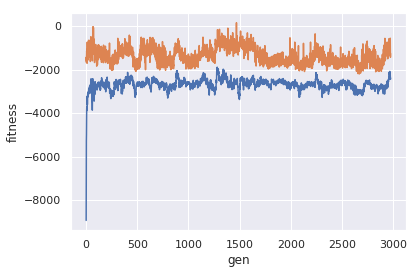

Cannot load vid
/data/log/tournamentfric/rep00/analysis_log_2749.txt


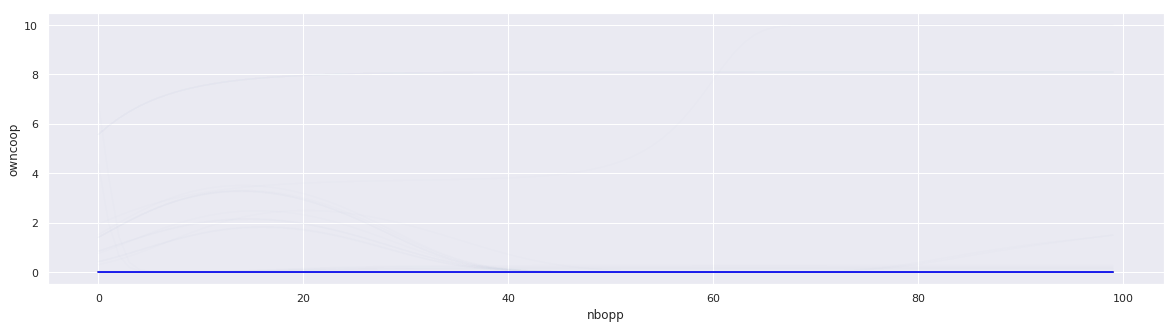

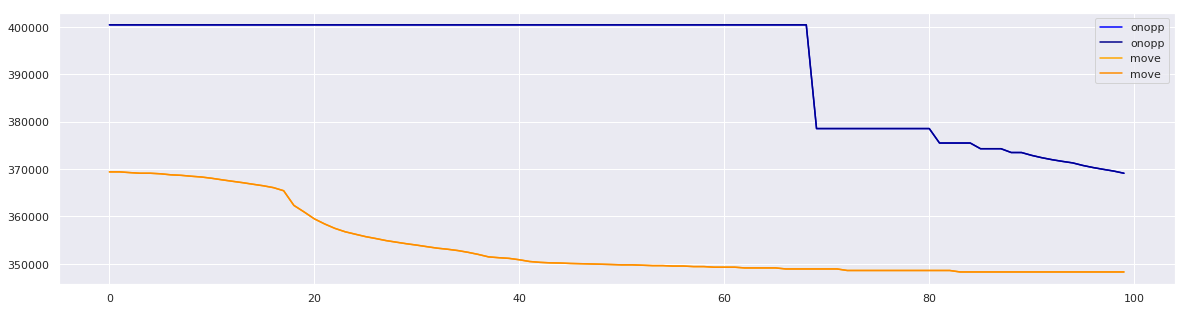

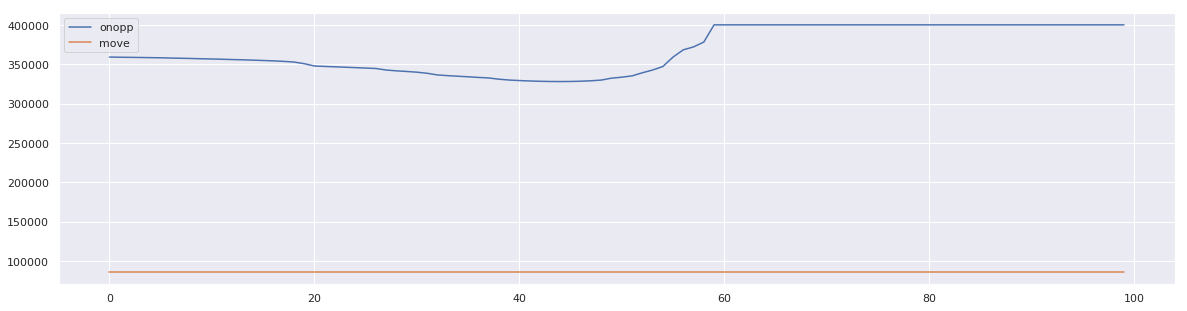

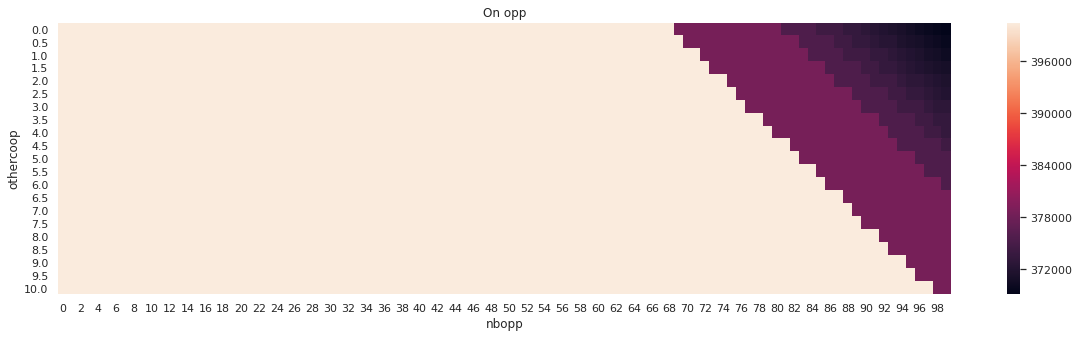

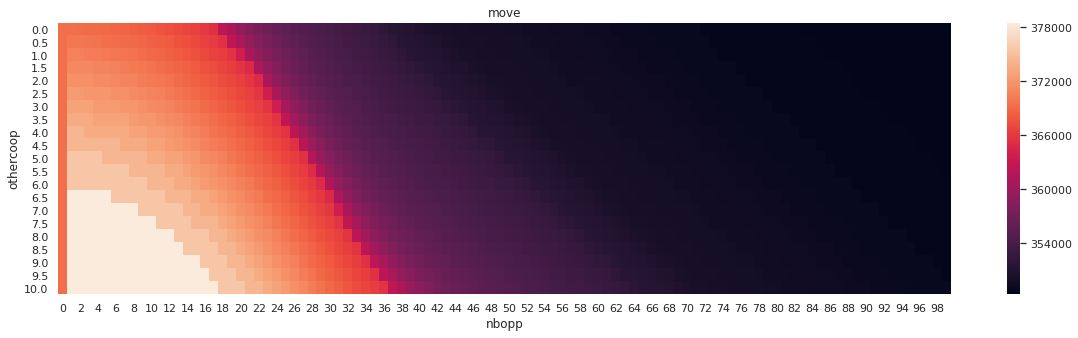

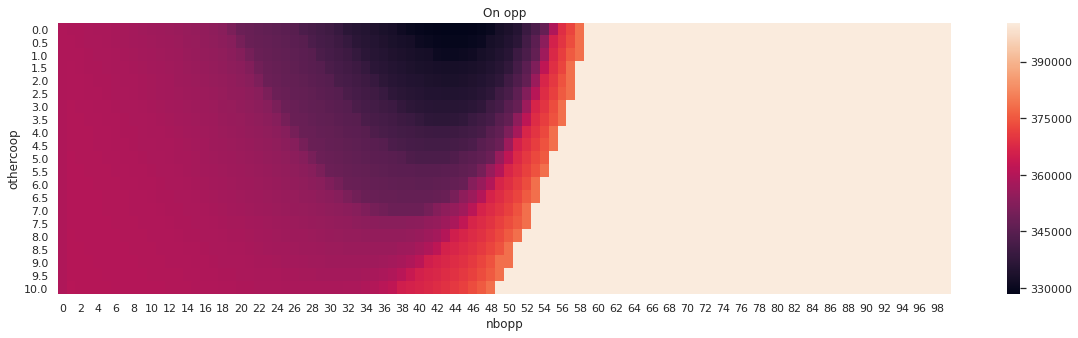

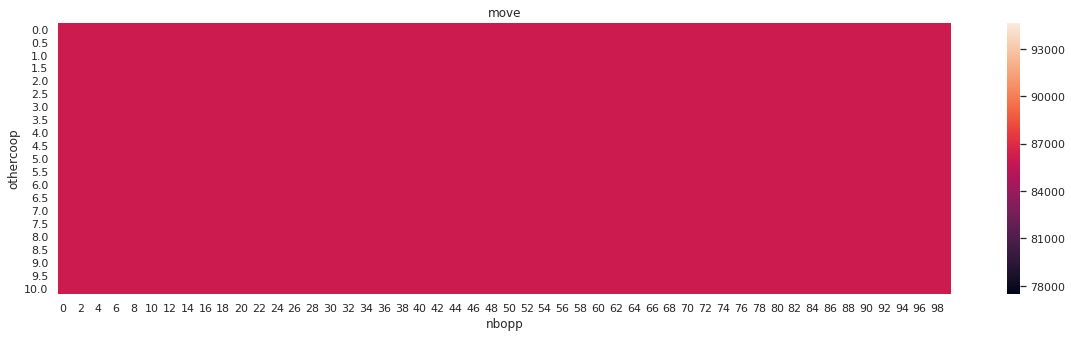

In [28]:
dofolloworbit = True
path = "/home/pecoffet/remoterobo/logs/lions-decay-50-2019-05-18-0036/lion/**/rep00/"
path = "/data/log/tournamentfric/rep00/"
for path in sorted(glob.glob(path, recursive=True)):
    display(HTML(f'<h3>{path}</h3>'))
    try:
        fit = read_csvx(path + "fitnesslog.txt", delimiter="\t")
        fit = fit.groupby(['gen', 'ind'], as_index=False).sum()
        plt.figure()
        sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='median')
        sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='max')
        #sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='min')
        plt.show()
    except Exception:
        print('Cannot load fitness')
    # Video
    try:
        vid = Video(gethighest(glob.glob(path+'/mov_*.mp4')))
        display(vid)
    except Exception:
        print('Cannot load vid')
    high = gethighest(glob.glob(path+'/analysis_log_*'));
    print(high)
    df = read_csvx(high, delimiter="\t")
    df['rank'] = scipy.stats.rankdata(df['score'])
    plt.figure(figsize=(20, 5))
    sns.lineplot(x='nbopp', y='owncoop', units='ind', data=df.query('othercoop == 0 and cost == 1'), estimator=None, legend='full', alpha=0.01)
    sns.lineplot(x='nbopp', y='owncoop', data=df.query('othercoop == 0 and cost == 1'), estimator=np.median, legend='full', color="blue")

    plt.show()
    if dofolloworbit:
        path = df.query('othercoop == 0 and cost == 0').groupby('nbopp')['owncoop'].median().values
        plt.figure(figsize=(20, 5))
        plt.plot(followorbit(df.query('ind == 0 and cost == 0'), [val * 0.5 for val in path]), label="onopp", color="blue")
        plt.plot(followorbit(df.query('ind == 0 and cost == 0'), [val * 1.5 for val in path]), label="onopp", color="darkblue")
        plt.plot(followorbit(df.query('ind == 0 and cost == 1'), [val * 0.5 for val in path]), label="move", color="orange")
        plt.plot(followorbit(df.query('ind == 0 and cost == 1'), [val * 1.5 for val in path]), label="move", color="darkorange")
        plt.legend()
        plt.show()
        plt.figure(figsize=(20, 5))
        plt.plot(followorbit(df.query('ind == 10 and cost == 0'), path), label="onopp")
        plt.plot(followorbit(df.query('ind == 10 and cost == 1'), path), label="move")
        plt.legend()
        plt.show()
        plt.figure(figsize=(20, 5))
        sns.heatmap(df.query('ind == 0 and cost == 0').pivot_table('rank', 'othercoop', 'nbopp'))
        plt.title('On opp')
        plt.show()
        plt.figure(figsize=(20, 5))
        sns.heatmap(df.query('ind == 0 and cost == 1').pivot_table('rank', 'othercoop', 'nbopp'))
        plt.title('move')
        plt.show()
        plt.figure(figsize=(20, 5))
        sns.heatmap(df.query('ind == 10 and cost == 0').pivot_table('rank', 'othercoop', 'nbopp'))
        plt.title('On opp')
        plt.show()
        plt.figure(figsize=(20, 5))
        sns.heatmap(df.query('ind == 10 and cost == 1').pivot_table('rank', 'othercoop', 'nbopp'))
        plt.title('move')
        plt.show()

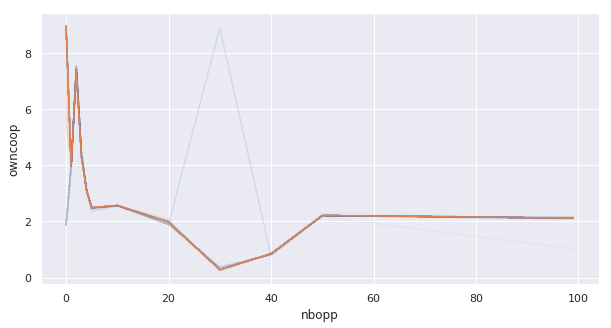

In [4]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='nbopp', y='owncoop', units='ind', data=df.query('othercoop == 0 and cost == 1'), estimator=None, legend='full', alpha=0.01)
sns.lineplot(x='nbopp', y='owncoop', data=df.query('othercoop == 0 and cost == 1'), estimator=np.median, legend='full')


In [5]:
?sns.lineplot

Signature:
sns.lineplot(
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    data=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    units=None,
    estimator='mean',
    ci=95,
    n_boot=1000,
    sort=True,
    err_style='band',
    err_kws=None,
    legend='brief',
    ax=None,
    **kwargs,
)
Docstring:
Draw a line plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue`` and ``style`` for the sam